In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Functions

In [35]:
# objective function
def f(x):
    #return x**2 + 1
    #return ( (x-1)**2+0.15 )*( (x+1)**2 )
    return np.abs(x) - np.cos(10*x)
# end

# cooling schedule
def Temp( t, T0, tau ):
    return T0*np.exp( -(1.0*t)/tau )
# end

# simulated annealing function
def SA( start, nStep, pWidth, tau ):
	
    # Create array of solution solutions
    solutions = np.zeros(nStep)
    solutions[0] = start
    
    # Perform Simulated Annealing
    for i in range(nStep-1):
        
        # Get current guess
        curr = solutions[i]
        # Evaluate its function value
        currF = f(curr)
        
        # Randomly generate a new candidate solution near the current one
        cand = np.random.normal(curr,pWidth,size=1)[0]
        # Evaluate its function value
        candF = f( cand )
        
        # Set initial temperature
        if i==0 :
            T0 = abs(candF - currF)
        # end
        
        # Calculate current temperature
        T = Temp( i, T0, tau )
        
        # Calculate the probability of accepting the candidate solution
        accProb = min( 1.0, np.exp( -(candF-currF)/T ) )
        
        # Add either the candidate or current solution to the array
        r = np.random.uniform(low=0, high=1, size=1)[0]
        if( r <= accProb ):
            solutions[i+1] = cand
        else:
            solutions[i+1] = curr
        # end
	# end
    
    return solutions
# end

# Run simulated annealing

Minimum x: -0.0012890020296004723
Minimum f: -0.9986279228090563


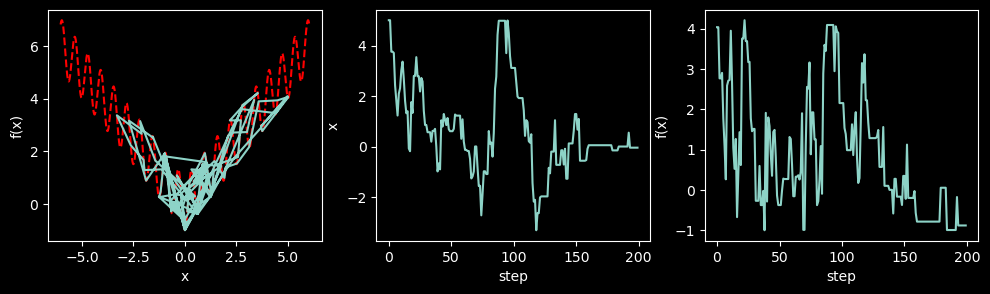

In [39]:
nStep  = 200
tau    = 100
pWidth = 1
start  = 5

# run SA
points = SA( start, nStep, pWidth, tau )

# get results
arg_min = np.argmin( f(points) )
x_min = points[arg_min]
f_min = f( x_min )
print(f"Minimum x: {x_min}")
print(f"Minimum f: {f_min}")

# plot history
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

xlim = max(max(abs(points)),start) + 0.25
graphX = np.linspace(-xlim*1.15,xlim*1.15,1000)

axes[0].plot(graphX,f(graphX),'r--')
axes[0].plot(points,f(points))
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

axes[1].plot(points)
axes[1].set_xlabel("step")
axes[1].set_ylabel("x")

axes[2].plot(f(points))
axes[2].set_xlabel("step")
axes[2].set_ylabel("f(x)")

plt.show()